# **More Advanced Task:**
## **Author:** Aniruddha Jana
## **Task description:**
ML Facial recognition to detect mood and suggest songs accordingly 

## Importing Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

#### Paths

In [ ]:
!unzip './emotions.zip' -d './emotions/'
train_path = '/content/emotions/train'
test_path = '/content/emotions/test'

Streaming output truncated to the last 5000 lines.
  inflating: ./emotions/train/sad/Training_65242339.jpg  
  inflating: ./emotions/train/sad/Training_65267116.jpg  
  inflating: ./emotions/train/sad/Training_65275626.jpg  
  inflating: ./emotions/train/sad/Training_6529266.jpg  
  inflating: ./emotions/train/sad/Training_65329617.jpg  
  inflating: ./emotions/train/sad/Training_65338712.jpg  
  inflating: ./emotions/train/sad/Training_65338797.jpg  
  inflating: ./emotions/train/sad/Training_65387162.jpg  
  inflating: ./emotions/train/sad/Training_65404494.jpg  
  inflating: ./emotions/train/sad/Training_65426218.jpg  
  inflating: ./emotions/train/sad/Training_65430136.jpg  
  inflating: ./emotions/train/sad/Training_65437377.jpg  
  inflating: ./emotions/train/sad/Training_6545735.jpg  
  inflating: ./emotions/train/sad/Training_65463385.jpg  
  inflating: ./emotions/train/sad/Training_65473985.jpg  
  inflating: ./emotions/train/sad/Training_65502829.jpg  
  inflating: ./emotions

## Plotting Sample Images

In [ ]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for Id, img_path in enumerate(img_files):
        plt.subplot(5, 5, Id+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

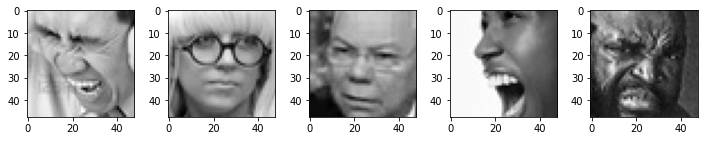

In [ ]:
plot_images(train_path+'/angry')


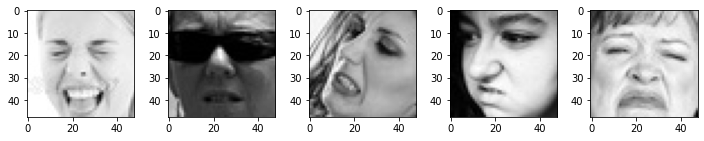

In [ ]:
plot_images(train_path+'/disgust')

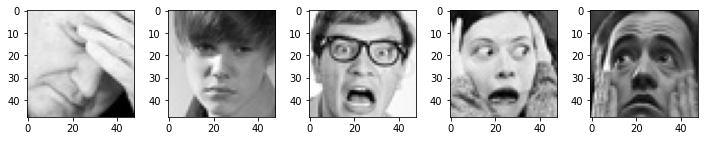

In [ ]:
plot_images(train_path+'/fear')

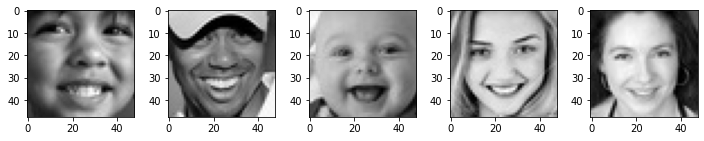

In [ ]:
plot_images(train_path+'/happy')

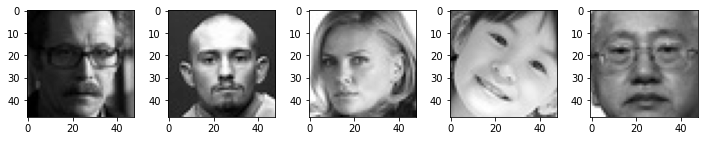

In [ ]:
plot_images(train_path+'/neutral')

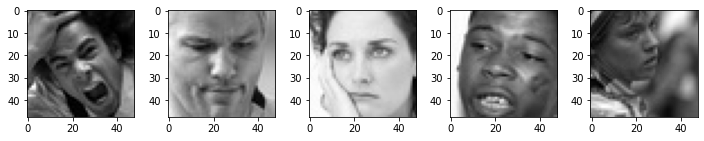

In [ ]:
plot_images(train_path+'/sad')

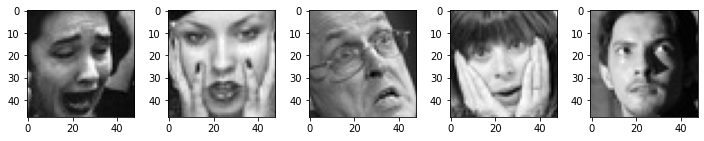

In [ ]:
plot_images(train_path+'/surprise')

## Preprocessing

In [ ]:
emotion_labels = sorted(os.listdir(train_path))
print("Emotion labels:")
for i in emotion_labels:
  print(i)

Emotion labels:
angry
disgust
fear
happy
neutral
sad
surprise


### Rescaling

In [ ]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_data_gen.flow_from_directory(
        '/content/emotions/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [ ]:
test_generator = test_data_gen.flow_from_directory(
        '/content/emotions/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


## Model Creation

In [ ]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

## Training Neural Network model

In [ ]:
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=45,
        validation_data=test_generator,
        validation_steps=7178 // 64)

Epoch 1/45
448/448 [==============================] - 29s 40ms/step - loss: 1.8001 - accuracy: 0.2613 - val_loss: 1.7017 - val_accuracy: 0.3471
Epoch 2/45
448/448 [==============================] - 18s 39ms/step - loss: 1.6260 - accuracy: 0.3682 - val_loss: 1.5432 - val_accuracy: 0.4128
Epoch 3/45
448/448 [==============================] - 17s 38ms/step - loss: 1.5262 - accuracy: 0.4130 - val_loss: 1.4622 - val_accuracy: 0.4375
Epoch 4/45
448/448 [==============================] - 18s 39ms/step - loss: 1.4525 - accuracy: 0.4441 - val_loss: 1.4065 - val_accuracy: 0.4701
Epoch 5/45
448/448 [==============================] - 17s 39ms/step - loss: 1.3882 - accuracy: 0.4692 - val_loss: 1.3395 - val_accuracy: 0.4866
Epoch 6/45
448/448 [==============================] - 17s 39ms/step - loss: 1.3373 - accuracy: 0.4930 - val_loss: 1.3034 - val_accuracy: 0.5040
Epoch 7/45
448/448 [==============================] - 17s 39ms/step - loss: 1.2954 - accuracy: 0.5076 - val_loss: 1.2948 - val_accuracy:

In [ ]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

## Saving Model

In [ ]:
emotion_model.save('emotion_detection_model.h5')
print("Model Saved!")

Model Saved!


In [ ]:
emotion_model.save_weights('emotion_detection_model_weights.h5')
print("Model weights Saved!")

Model weights Saved!


## Plots

In [ ]:
accuracy = emotion_model_info.history['accuracy']
val_acc = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']
epochs = range(len(accuracy))

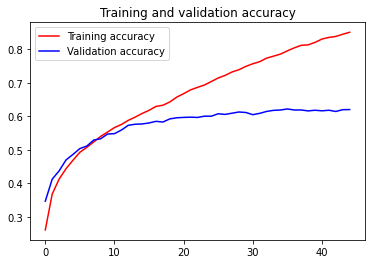

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

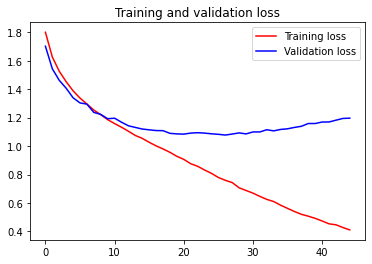

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [ ]:
from keras.preprocessing import image
import numpy as np

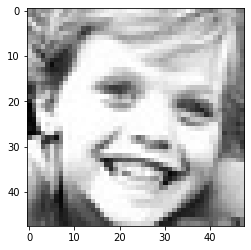

In [ ]:
test_img_path = test_path+"/happy/PrivateTest_3447769.jpg"
test_img = image.load_img(test_img_path, target_size=(48,48), color_mode="grayscale")
test_img = np.array(test_img)
plt.imshow(test_img, cmap='gray')

In [ ]:
print("Shape of Image:",test_img.shape)

Shape of Image: (48, 48)


In [ ]:
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img.reshape(1, 48, 48, 1)

In [ ]:
result = emotion_model.predict(test_img)
result = list(result[0])
ind = result.index(max(result))
emotion = emotion_labels[ind]
print("Predicted emotion:",emotion)

Predicted emotion: happy


### Playing Songs

In [ ]:
from IPython.display import Audio

#### Loading songs

In [ ]:
main_songs_path = '/content/emotion-audio-files/'
song_path = main_songs_path+emotion
song = os.path.join(song_path,emotion)

In [ ]:
print(f'Playing {emotion} song')

Playing happy song


In [ ]:
Audio(song + '.m4a', autoplay=True)